In [2]:
# import pandas as pd

# # Read the CSV file into a DataFrame
# df = pd.read_csv('out/result_20240425_032733.csv')

# # Convert the DataFrame to an Excel file
# df.to_excel('out/output_file.xlsx', index=False, header=True)

# Data Preparation

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.axes as axes

In [4]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('out/result_20240425_032733.csv')
df

,model_name,payload_rate,threshold,index_signal,secret_name,len_secret_data,len_extracted_secret_data,ncc,prd,snr,time
0,SVR 2.0,1,0,0,secret_0.99_bps,3564,3053,0.999993,0.178301,54.976947,3.904348
1,SVR 2.0,1,0,0,secret_0.66_bps,2376,2376,0.999994,0.157783,56.038772,3.067914
2,SVR 2.0,1,0,0,secret_0.51_bps,1836,1836,0.999996,0.138050,57.199288,2.387220
3,SVR 2.0,1,0,0,secret_0.48_bps,1728,1728,0.999996,0.135264,57.376375,2.220930
4,SVR 2.0,1,0,0,secret_0.39_bps,1404,1404,0.999996,0.125025,58.060092,1.821619
...,...,...,...,...,...,...,...,...,...,...,...
12415,SGD Regressor,3,1,45,secret_0.39_bps,1404,1404,0.999993,0.358940,48.899565,0.051551
12416,SGD Regressor,3,1,45,secret_0.32_bps,1152,1152,0.999995,0.301262,50.421125,0.042157
12417,SGD Regressor,3,1,45,secret_0.21_bps,756,756,0.999997,0.240243,52.386991,0.030091
12418,SGD Regressor,3,1,45,secret_0.15_bps,540,540,0.999997,0.227464,52.861732,0.020122


In [5]:
# Get secret bps as a number
df['secret_bps'] = df['secret_name'].apply(lambda x: float(x[7:11]))
df.head()

,model_name,payload_rate,threshold,index_signal,secret_name,len_secret_data,len_extracted_secret_data,ncc,prd,snr,time,secret_bps
0,SVR 2.0,1,0,0,secret_0.99_bps,3564,3053,0.999993,0.178301,54.976947,3.904348,0.99
1,SVR 2.0,1,0,0,secret_0.66_bps,2376,2376,0.999994,0.157783,56.038772,3.067914,0.66
2,SVR 2.0,1,0,0,secret_0.51_bps,1836,1836,0.999996,0.138050,57.199288,2.387220,0.51
3,SVR 2.0,1,0,0,secret_0.48_bps,1728,1728,0.999996,0.135264,57.376375,2.220930,0.48
4,SVR 2.0,1,0,0,secret_0.39_bps,1404,1404,0.999996,0.125025,58.060092,1.821619,0.39


In [6]:
df.columns

Index(['model_name', 'payload_rate', 'threshold', 'index_signal',
       'secret_name', 'len_secret_data', 'len_extracted_secret_data', 'ncc',
       'prd', 'snr', 'time', 'secret_bps'],
      dtype='object')

In [7]:
# Change SVR 2.0 to SVR
df['model_name'] = df['model_name'].replace('SVR 2.0', 'SVR')
df.head()

,model_name,payload_rate,threshold,index_signal,secret_name,len_secret_data,len_extracted_secret_data,ncc,prd,snr,time,secret_bps
0,SVR,1,0,0,secret_0.99_bps,3564,3053,0.999993,0.178301,54.976947,3.904348,0.99
1,SVR,1,0,0,secret_0.66_bps,2376,2376,0.999994,0.157783,56.038772,3.067914,0.66
2,SVR,1,0,0,secret_0.51_bps,1836,1836,0.999996,0.138050,57.199288,2.387220,0.51
3,SVR,1,0,0,secret_0.48_bps,1728,1728,0.999996,0.135264,57.376375,2.220930,0.48
4,SVR,1,0,0,secret_0.39_bps,1404,1404,0.999996,0.125025,58.060092,1.821619,0.39


# Create Graph

In [8]:
filtered_df = df[(df['payload_rate'] == 1) & (df['threshold'] == 1)][[
    'model_name', 'secret_bps', 'index_signal', 'ncc', 'prd', 'snr', 'time']].sort_values(by=['model_name', 'secret_bps'])
filtered_df.head()

,model_name,secret_bps,index_signal,ncc,prd,snr,time
7874,Bayesian Ridge,0.08,0,0.999998,0.088466,61.064519,0.012295
7883,Bayesian Ridge,0.08,1,0.999999,0.090614,60.856122,0.012818
7892,Bayesian Ridge,0.08,2,1.000000,0.074724,62.530824,0.012786
7901,Bayesian Ridge,0.08,3,0.999999,0.086535,61.256145,0.011881
7910,Bayesian Ridge,0.08,4,1.000000,0.073018,62.731346,0.011834


Graph by ML with y: secret_bps and line: model_name

In [9]:
mean_by_snr = filtered_df.groupby(
    ['model_name', 'secret_bps'])['snr'].mean()
mean_by_snr

model_name      secret_bps
Bayesian Ridge  0.08          63.809847
                0.15          61.088152
                0.21          59.722687
                0.32          57.835163
                0.39          57.010912
                0.48          56.180306
                0.51          55.857470
                0.66          54.711341
                0.99          52.942905
ElasticNet      0.08          63.770494
                0.15          61.103583
                0.21          59.526255
                0.32          57.704963
                0.39          56.862384
                0.48          56.064408
                0.51          55.792824
                0.66          54.598393
                0.99          52.872803
LASSO           0.08          63.915252
                0.15          61.144188
                0.21          59.682942
                0.32          57.867258
                0.39          57.019795
                0.48          56.111510
             

In [10]:
new_mean_by_snr = mean_by_snr.reset_index()
new_mean_by_snr.head()

,model_name,secret_bps,snr
0,Bayesian Ridge,0.08,63.809847
1,Bayesian Ridge,0.15,61.088152
2,Bayesian Ridge,0.21,59.722687
3,Bayesian Ridge,0.32,57.835163
4,Bayesian Ridge,0.39,57.010912


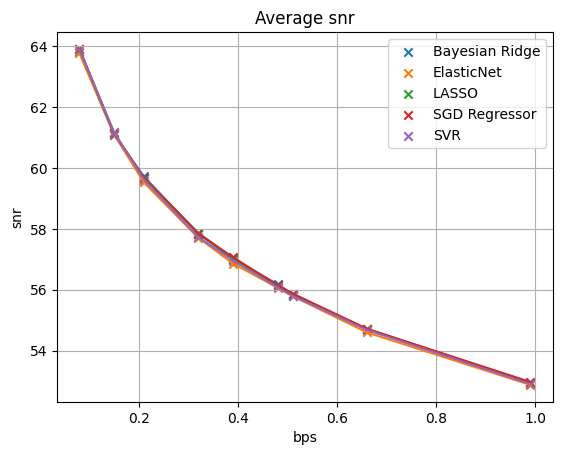

In [11]:
# Group data by 'model_name'
grouped_df = new_mean_by_snr.groupby('model_name')

# Plot line chart
for name, group in grouped_df:
    plt.plot(group['secret_bps'], group['snr'])
    plt.scatter(group['secret_bps'], group['snr'],
                marker='x', label=name)

plt.grid()
plt.xlabel('bps')
plt.ylabel('snr')
plt.title('Average snr')
plt.legend()
plt.show()

In [12]:
def generate_graph_by_x_secret_bps_line_model_name(dataframe: pd.DataFrame, parameter: str):
    mean_by_parameter = dataframe.groupby(
        ['model_name', 'secret_bps'])[parameter].mean()

    new_mean_by_parameter = mean_by_parameter.reset_index()

    # Group data by 'model_name'
    grouped_df = new_mean_by_parameter.groupby('model_name')

    # Plot line chart
    for name, group in grouped_df:
        plt.plot(group['secret_bps'], group[parameter])
        plt.scatter(group['secret_bps'], group[parameter],
                    marker='x', label=name)

    plt.grid()
    plt.xlabel('BPS')
    plt.ylabel(parameter)
    plt.title(f'Average {parameter.upper()} by BPS')
    plt.legend()
    plt.show()

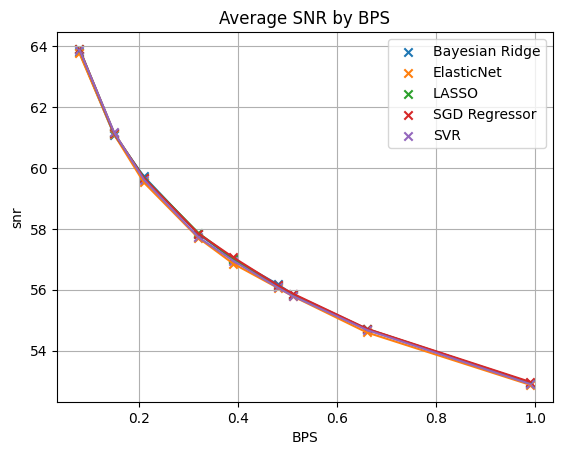

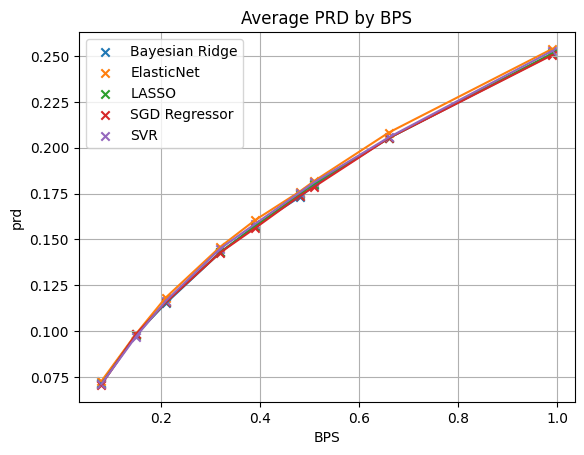

In [13]:
generate_graph_by_x_secret_bps_line_model_name(filtered_df, 'snr')
generate_graph_by_x_secret_bps_line_model_name(filtered_df, 'prd')

In [14]:
def generate_graph_by_x_model_name_line_secret_bps(axs: axes.Axes, dataframe: pd.DataFrame, parameter: str):
    print(parameter)
    mean_by_parameter = dataframe.groupby(
        ['model_name', 'secret_bps'])[parameter].mean()
    print(mean_by_parameter)
    
    new_mean_by_parameter = mean_by_parameter.reset_index()

    # Group data by 'model_name'
    grouped_df = new_mean_by_parameter.groupby('secret_bps')

    # Plot line chart
    for name, group in grouped_df:
        axs.plot(group['model_name'], group[parameter])
        axs.scatter(group['model_name'], group[parameter],
                    marker='x', label=name)

    axs.grid()
    axs.set_xlabel('Model Name', fontsize=14)
    axs.set_ylabel(parameter.upper(), fontsize=14)
    axs.set_title(f'Average {parameter.upper()} by Model')
    axs.tick_params(axis='y', labelsize=14)
    axs.tick_params(axis='x', labelrotation=30, labelsize=14)

snr
model_name      secret_bps
Bayesian Ridge  0.08          63.809847
                0.15          61.088152
                0.21          59.722687
                0.32          57.835163
                0.39          57.010912
                0.48          56.180306
                0.51          55.857470
                0.66          54.711341
                0.99          52.942905
ElasticNet      0.08          63.770494
                0.15          61.103583
                0.21          59.526255
                0.32          57.704963
                0.39          56.862384
                0.48          56.064408
                0.51          55.792824
                0.66          54.598393
                0.99          52.872803
LASSO           0.08          63.915252
                0.15          61.144188
                0.21          59.682942
                0.32          57.867258
                0.39          57.019795
                0.48          56.111510
         

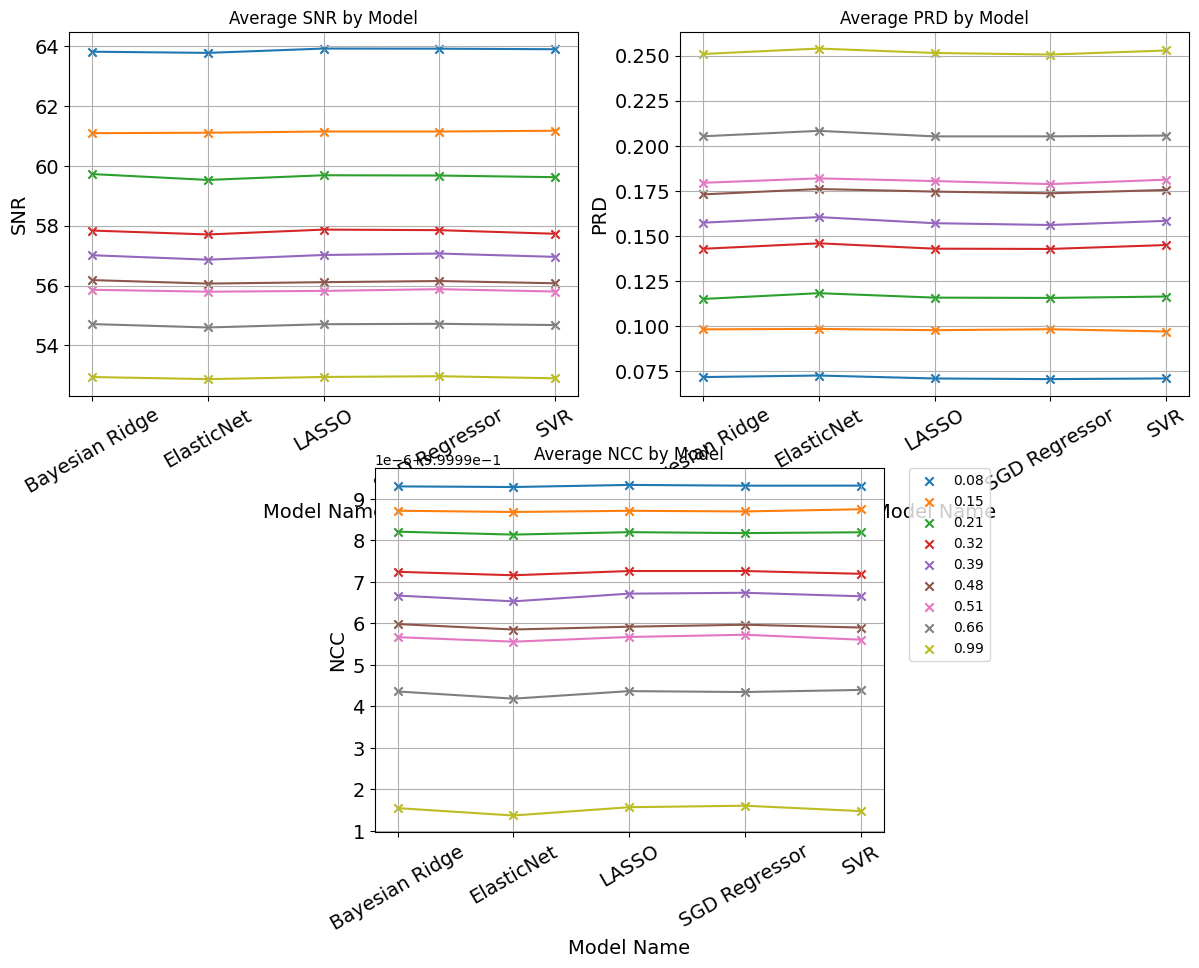

In [15]:
fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
gs = gridspec.GridSpec(2, 4, figure=fig)
gs.update(wspace=0.5)

ax_snr = plt.subplot(gs[0, :2])
ax_prd = plt.subplot(gs[0, 2:])
ax_ncc = plt.subplot(gs[1, 1:3])

generate_graph_by_x_model_name_line_secret_bps(ax_snr, filtered_df, 'snr')
generate_graph_by_x_model_name_line_secret_bps(ax_prd, filtered_df, 'prd')
generate_graph_by_x_model_name_line_secret_bps(ax_ncc, filtered_df, 'ncc')

ax_ncc.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

Graph by ML with x: secret_bps, ML: lasso, PR: 1, line: threshold = 1->3

In [16]:
filtered_df = df[(df['model_name'] == 'LASSO')].copy()
filtered_df['pr_n_t'] = filtered_df.apply(lambda row: row['threshold'] + row['payload_rate'], axis=1)
filtered_df = filtered_df[[
    'pr_n_t', 'secret_bps', 'index_signal', 'ncc', 'prd', 'snr', 'time']].sort_values(by=['pr_n_t', 'secret_bps'])
filtered_df.head()

,pr_n_t,secret_bps,index_signal,ncc,prd,snr,time
2492,1,0.08,0,0.999999,0.056327,64.985624,0.022831
2501,1,0.08,1,0.999999,0.056238,64.999426,0.023410
2510,1,0.08,2,1.000000,0.053269,65.470506,0.022234
2519,1,0.08,3,1.000000,0.052478,65.600522,0.023269
2528,1,0.08,4,1.000000,0.047507,66.464910,0.021621


In [17]:
def generate_graph_by_x_secret_bps_line_pr_n_t(axs: axes.Axes, dataframe: pd.DataFrame, parameter: str):
    mean_by_parameter = dataframe.groupby(
        ['pr_n_t', 'secret_bps'])[parameter].mean()
    print(parameter)
    mean_by_parameter.to_csv(f'out/v3_pr_n_t_{parameter}.csv')

    new_mean_by_parameter = mean_by_parameter.reset_index()

    # Group data by 'pr_n_t'
    grouped_df = new_mean_by_parameter.groupby('pr_n_t')

    # Plot line chart
    for name, group in grouped_df:
        axs.plot(group['secret_bps'], group[parameter])
        axs.scatter(group['secret_bps'], group[parameter],
                    marker='x', label=f'{name}')

    axs.grid()
    axs.set_xlabel('BPS', fontsize=14)
    axs.set_ylabel(parameter.upper(), fontsize=14)
    axs.set_title(f'Average {parameter.upper()} by Max Sample Bits')
    axs.tick_params(axis='both', labelsize=14)

snr
prd
ncc


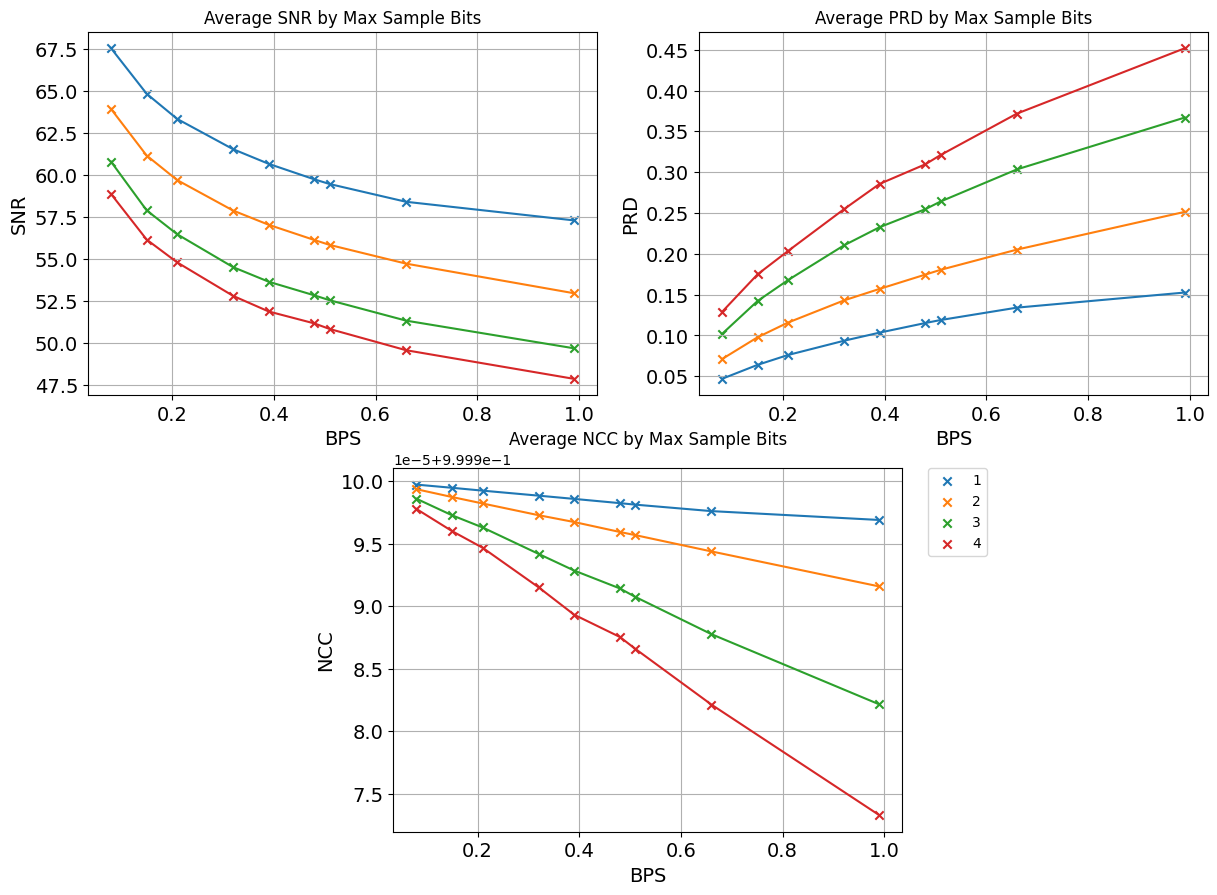

In [18]:
fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
gs = gridspec.GridSpec(2, 4, figure=fig)
gs.update(wspace=0.5)

ax_snr = plt.subplot(gs[0, :2])
ax_prd = plt.subplot(gs[0, 2:])
ax_ncc = plt.subplot(gs[1, 1:3])

generate_graph_by_x_secret_bps_line_pr_n_t(ax_snr, filtered_df, 'snr')
generate_graph_by_x_secret_bps_line_pr_n_t(ax_prd, filtered_df, 'prd')
generate_graph_by_x_secret_bps_line_pr_n_t(ax_ncc, filtered_df, 'ncc')

ax_ncc.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

In [19]:
filtered_df_for_model_name = df[(df['payload_rate'] == 1) & (df['threshold'] == 1)][[
    'model_name', 'secret_bps', 'index_signal', 'ncc', 'prd', 'snr', 'time']].sort_values(by=['model_name', 'secret_bps'])
filtered_df_for_model_name.head()

,model_name,secret_bps,index_signal,ncc,prd,snr,time
7874,Bayesian Ridge,0.08,0,0.999998,0.088466,61.064519,0.012295
7883,Bayesian Ridge,0.08,1,0.999999,0.090614,60.856122,0.012818
7892,Bayesian Ridge,0.08,2,1.000000,0.074724,62.530824,0.012786
7901,Bayesian Ridge,0.08,3,0.999999,0.086535,61.256145,0.011881
7910,Bayesian Ridge,0.08,4,1.000000,0.073018,62.731346,0.011834


In [20]:
mean_by_parameter = filtered_df_for_model_name.groupby(
    ['model_name', 'secret_bps'])['snr'].mean()
print(mean_by_parameter)

model_name      secret_bps
Bayesian Ridge  0.08          63.809847
                0.15          61.088152
                0.21          59.722687
                0.32          57.835163
                0.39          57.010912
                0.48          56.180306
                0.51          55.857470
                0.66          54.711341
                0.99          52.942905
ElasticNet      0.08          63.770494
                0.15          61.103583
                0.21          59.526255
                0.32          57.704963
                0.39          56.862384
                0.48          56.064408
                0.51          55.792824
                0.66          54.598393
                0.99          52.872803
LASSO           0.08          63.915252
                0.15          61.144188
                0.21          59.682942
                0.32          57.867258
                0.39          57.019795
                0.48          56.111510
             

snr
model_name      secret_bps
Bayesian Ridge  0.08          63.809847
                0.15          61.088152
                0.21          59.722687
                0.32          57.835163
                0.39          57.010912
                0.48          56.180306
                0.51          55.857470
                0.66          54.711341
                0.99          52.942905
ElasticNet      0.08          63.770494
                0.15          61.103583
                0.21          59.526255
                0.32          57.704963
                0.39          56.862384
                0.48          56.064408
                0.51          55.792824
                0.66          54.598393
                0.99          52.872803
LASSO           0.08          63.915252
                0.15          61.144188
                0.21          59.682942
                0.32          57.867258
                0.39          57.019795
                0.48          56.111510
         

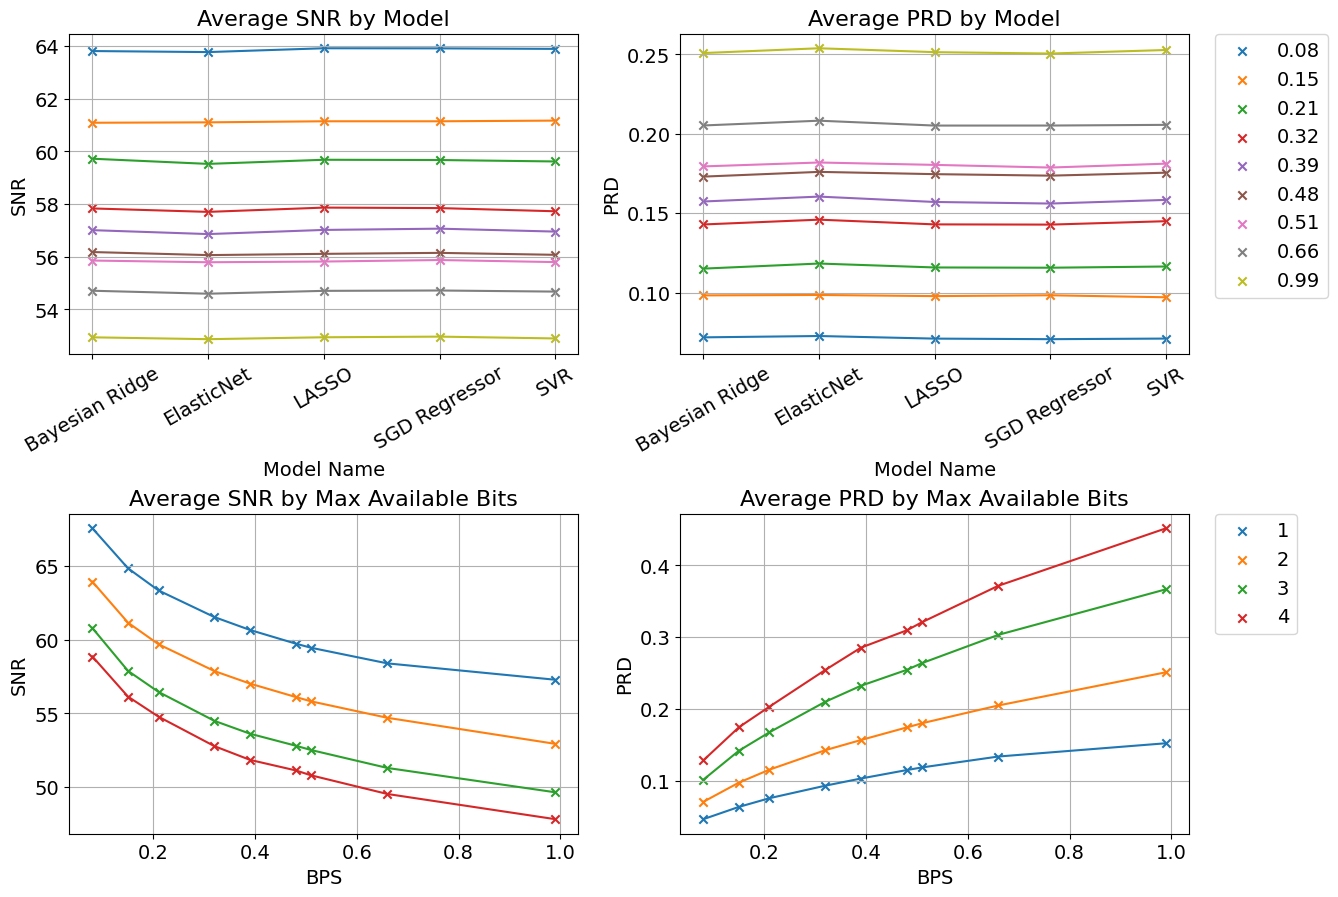

In [21]:
fig = plt.figure(figsize=(14, 10))
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
gs = gridspec.GridSpec(2, 4, figure=fig, wspace=0.5, hspace=0.5)

ax_snr = plt.subplot(gs[0, :2])
ax_prd = plt.subplot(gs[0, 2:])
ax_snr2 = plt.subplot(gs[1, :2])
ax_prd2 = plt.subplot(gs[1, 2:])

generate_graph_by_x_model_name_line_secret_bps(
    ax_snr, filtered_df_for_model_name, 'snr')
generate_graph_by_x_model_name_line_secret_bps(
    ax_prd, filtered_df_for_model_name, 'prd')
generate_graph_by_x_secret_bps_line_pr_n_t(ax_snr2, filtered_df, 'snr')
generate_graph_by_x_secret_bps_line_pr_n_t(ax_prd2, filtered_df, 'prd')

ax_snr.set_title(f'Average SNR by Model', fontsize=16)
ax_prd.set_title(f'Average PRD by Model', fontsize=16)
ax_snr2.set_title(f'Average SNR by Max Available Bits', fontsize=16)
ax_prd2.set_title(f'Average PRD by Max Available Bits', fontsize=16)

ax_prd.legend(fontsize=14, loc='upper left',
              bbox_to_anchor=(1.05, 1), borderaxespad=0.)
ax_prd2.legend(fontsize=14, loc='upper left',
               bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.savefig('out/v3_snr_prd_comparison.png', dpi=300)
plt.show()

## Speed

In [22]:
print(df.head())
print(df.columns)

  model_name  payload_rate  threshold  index_signal      secret_name  \
0        SVR             1          0             0  secret_0.99_bps   
1        SVR             1          0             0  secret_0.66_bps   
2        SVR             1          0             0  secret_0.51_bps   
3        SVR             1          0             0  secret_0.48_bps   
4        SVR             1          0             0  secret_0.39_bps   

   len_secret_data  len_extracted_secret_data       ncc       prd        snr  \
0             3564                       3053  0.999993  0.178301  54.976947   
1             2376                       2376  0.999994  0.157783  56.038772   
2             1836                       1836  0.999996  0.138050  57.199288   
3             1728                       1728  0.999996  0.135264  57.376375   
4             1404                       1404  0.999996  0.125025  58.060092   

       time  secret_bps  
0  3.904348        0.99  
1  3.067914        0.66  
2  2.387

In [23]:
filtered_df = df.copy()
filtered_df['pr_n_t'] = df.apply(
    lambda row: row['threshold'] + row['payload_rate'], axis=1)
mean_by_time = filtered_df[filtered_df['pr_n_t'] == 2].groupby(
    ['model_name', 'secret_bps'])['time'].mean()
mean_by_time = mean_by_time.reset_index()
mean_by_time

,model_name,secret_bps,time
0,Bayesian Ridge,0.08,0.012214
1,Bayesian Ridge,0.15,0.022784
2,Bayesian Ridge,0.21,0.032231
3,Bayesian Ridge,0.32,0.049322
4,Bayesian Ridge,0.39,0.058839
5,Bayesian Ridge,0.48,0.074158
6,Bayesian Ridge,0.51,0.076682
7,Bayesian Ridge,0.66,0.100567
8,Bayesian Ridge,0.99,0.150972
9,ElasticNet,0.08,0.011645


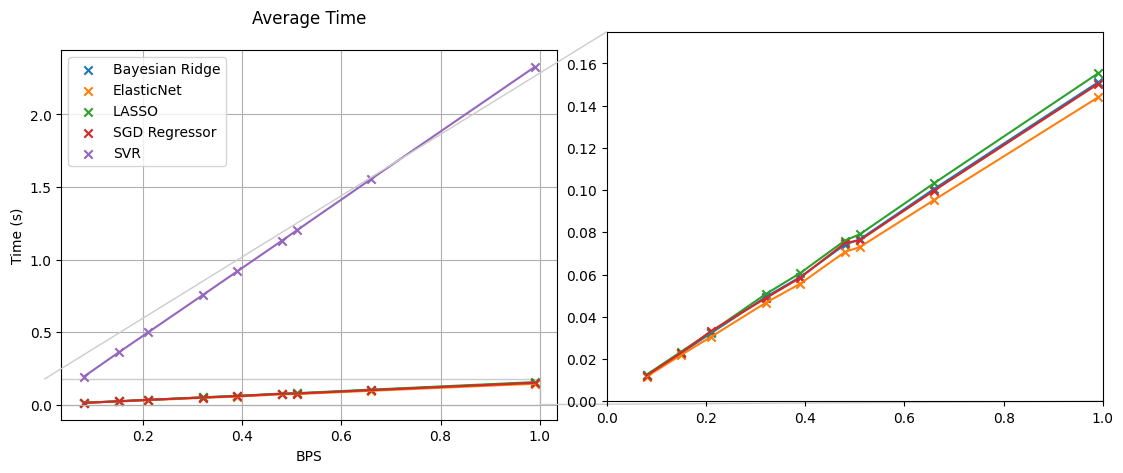

In [24]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes, mark_inset

fig, ax = plt.subplots()

ax.grid()
ax.set_xlabel('BPS')
ax.set_ylabel('Time (s)')
ax.set_title(f'Average Time')

axins = ax.inset_axes(
    [1.1, 0.05, 1, 1],
    xlim=(0., 1.), ylim=(0, 0.175)
)
# ax.indicate_inset_zoom(axins)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.8")

grouped_df = mean_by_time.groupby('model_name')

# Plot line chart
for name, group in grouped_df:
    ax.plot(group['secret_bps'], group['time'])
    ax.scatter(group['secret_bps'], group['time'],
                marker='x', label=name)
    
    axins.plot(group['secret_bps'], group['time'])
    axins.scatter(group['secret_bps'], group['time'],
                marker='x')

ax.legend(loc='upper left')
plt.title('Average Time')
plt.show()

In [25]:
new_mean_by_time = mean_by_time.groupby(
    ['model_name'])['time'].mean()
new_mean_by_time.reset_index()

,model_name,time
0,Bayesian Ridge,0.064196
1,ElasticNet,0.061023
2,LASSO,0.065998
3,SGD Regressor,0.064075
4,SVR,0.993323
